# Project 02 - Due Friday, October 13 at 12pm

*Objectives*: Design a relational database schema for transaction processing. Use SQL to load the data into the database and retrieve information from the database.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, shell commands, diagrams and markdown cells.  The notebook itself should be completely reproducible (using AWS EC2 instance based on the provided AMI) from start to finish; another person should be able to use the code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in groups**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, October 13, 12pm.  One member of each group must submit your notebook to Blackboard; you should not submit it separately.

## Part 1 - Requirements

The city is going to launch a new bike sharing system. Your task is to design a relational database to support its operation. The bike sharing system works as follows:

1. Riders can buy annual, semiannual or monthly membership. We need to have a record of each member's name and address in order to send them a key. Keys can be used to check out bikes at any bike station. Members have the option to renew their memberships before they expire. A member becomes inactive when his or her membership expires, therefore we need to know when their memberships expire. 

1. Each bike station has a pubic name (i.e. "18th & C St NW"). Occasionally in response to public requests, stations can be renamed. Each bike station have been built with a number of docking points.

1. Each bike is either serviceable or disabled. If it is disabled, it is removed from the station for repair.

1. For simplicity's sake, each serviceable bike is either docked at a station or checked out by a member. If it is checked out by a member, the system needs to know who has checked it out and when.

Your database should minimally support the above requirements.

## Part 2 - Designing a Database Schema (35 points)

Based on what you read above, design a relational database schema consisting of *at least* 3 tables. Document your schema with a schema diagram.  There are several tools available for this, such as [Google Drawings](https://docs.google.com/drawings/) and Microsoft Visio. Make sure to include the schema diagram in your submission. Embed and display the diagram in your notebook. **Discuss your major design decisions.** Be aware that your schema is designed to support transaction processing and should be optimized for writes and data consistency.

We are looking for the following when grade this part of the project:

* All required attributes are recorded.
* In the schema diagram, all primary keys are underlined. Directed lines are drawn from the foreign keys to the primary keys.
* Your database schema should be designed to promite data consistency and integrity and reduce the duplication of data. Strive for 3NF.
* Your database schema should be designed to support the requirements described in Part 1, as well as problems in Part 4 and 5.
* Key design decisions are discussed and documented in Markdown cells.

See slide 23 of week-04 lecture for an example of schema diagram. 

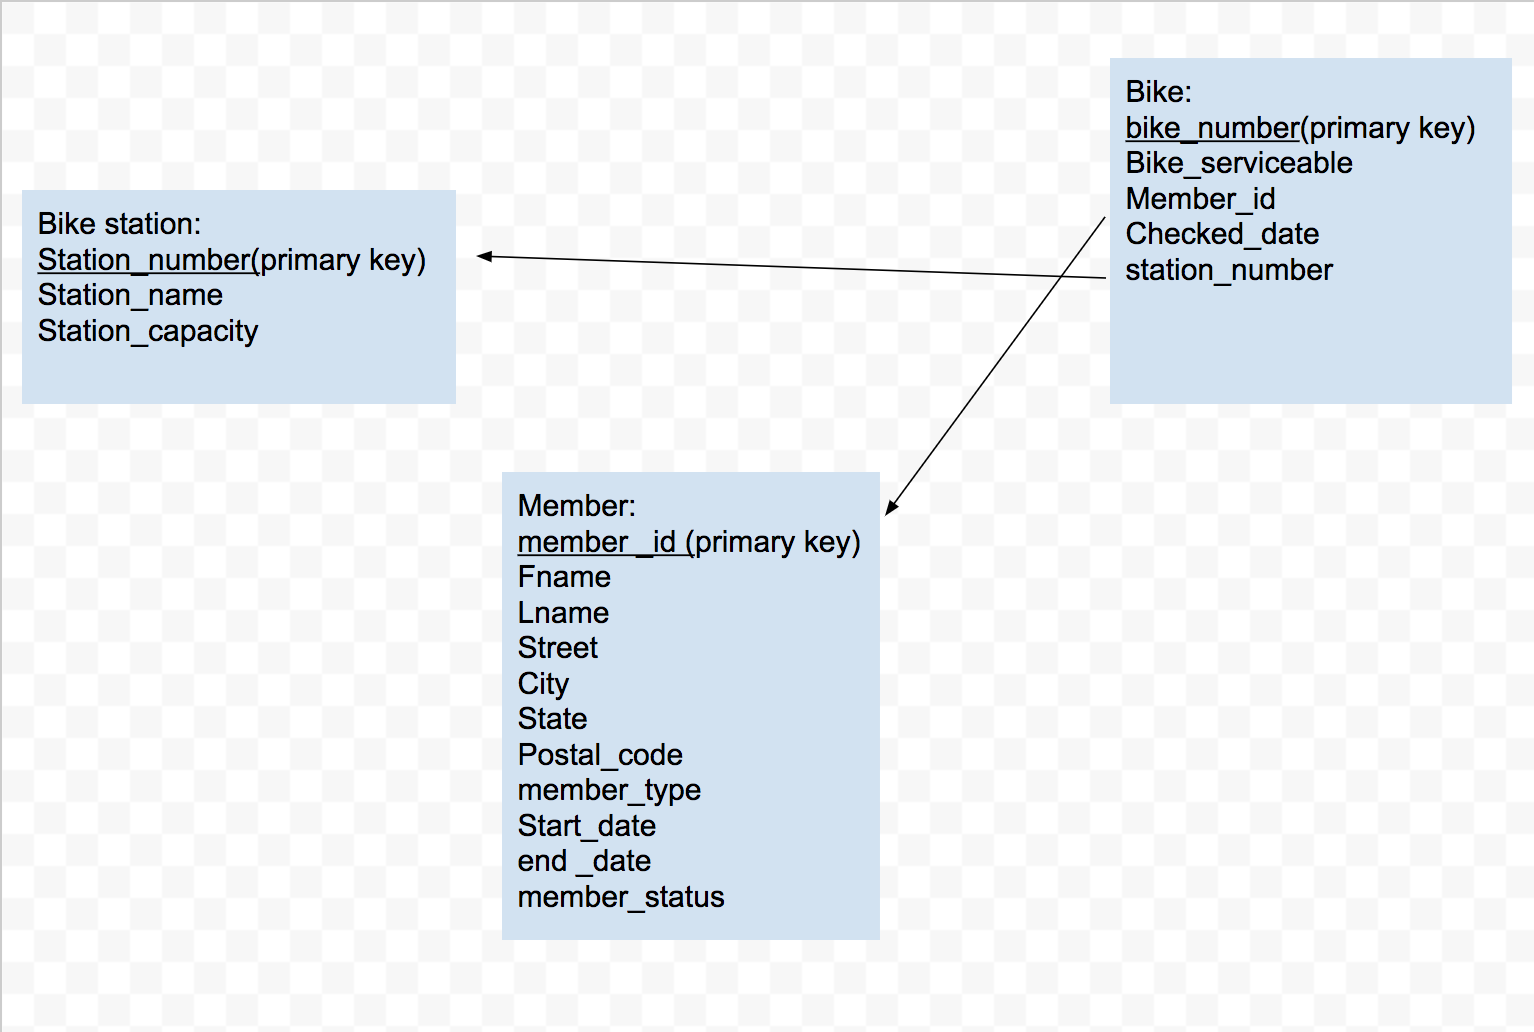

In this design, I created three different tables. The first one is the member talbe, which holds all the member informaiton from member's name to their membership type. The reason I seprated the last name and first name and sepcific parts of members' address is because they are all compound variables. I created this variable member ID as the primary key, so each member should have unique id. It will help us to find specifc member. For the bike station table. I am using station number as its primary key, because station number should be unique and station name should be changeable.  For the bike table, bike number as the primary key to differenciate the bikes. We have foreign key, station number, attribute to the bike station, so we know where the bike is. 

In this design, we do not have any duplicates in the table, so all the variables are unique expect the foreign keys which are pointed to the primary keys. 

## Part 3 - ETL (30 points)
Please use markdown cells to **document major steps**. Use SQL queries and markdown cells to demonstrate that records are created or updated successfully.

### Problem 3.1
Examine the data located at https://s3.amazonaws.com/dmfa-2017/bike_stations.csv.
Create and connect to a new PostgreSQL database named `proj2`. Use SQL DDL to create your tables in it based on the database schema you designed in Part 2 and the data. Don't forget about the contraints (primary keys, foreign keys, proper attribute types, NOT NULL etc).

First, drop the database named `proj2` if it exists. It is necessary so that we can run this notebook repeatedly. If you get the error that says "database proj2 does not exist", that is fine. However if it complains that "There is 1 other session using the database", please restart the Kernel and try it again.

In [6]:
!dropdb -U student proj2

dropdb: database removal failed: ERROR:  database "proj2" is being accessed by other users
DETAIL:  There is 1 other session using the database.


In [7]:
!createdb -U student proj2

createdb: database creation failed: ERROR:  database "proj2" already exists


In [8]:
!wget -O bike_stations.csv https://s3.amazonaws.com/dmfa-2017/bike_stations.csv

--2017-10-13 16:33:02--  https://s3.amazonaws.com/dmfa-2017/bike_stations.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.32.106
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.32.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169879 (166K) [text/csv]
Saving to: ‘bike_stations.csv’

bike_stations.csv   100%[===================>] 165.90K  --.-KB/s    in 0.006s  

2017-10-13 16:33:02 (28.1 MB/s) - ‘bike_stations.csv’ saved [169879/169879]



In [9]:
!wc -l bike_stations.csv

4318 bike_stations.csv


In [10]:
!csvcut -n bike_stations.csv

  1: Bike number
  2: Bike serviceable
  3: Station number
  4: Station name
  5: Station capacity


In [11]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [12]:
%sql postgresql://student@/proj2

'Connected: student@proj2'

In [13]:
%%sql
DROP TABLE IF EXISTS bike;
DROP TABLE IF EXISTS bike_station;
DROP TABLE IF EXISTS member;

CREATE TABLE member(
    member_id SERIAL PRIMARY KEY ,
    fname VARCHAR(20) NOT NULL,
    lname VARCHAR(20) NOT NULL,
    street VARCHAR(30) NOT NULL,
    city VARCHAR(30) NOT NULL,
    state VARCHAR(30) NOT NULL,
    postal_code VARCHAR(10) NOT NULL,
    member_type CHAR(20) NOT NULL,
    start_date TIMESTAMP NOT NULL,
    end_date TIMESTAMP NOT NULL,
    member_status VARCHAR(30) NOT NULL)

Done.
Done.
Done.
Done.


[]

For the member table, we used increment command SERIAL for member id, so each member should have unique IDs. We also added not null constraint to all the variables to make sure that all the variables are entered. 

In [14]:
%%sql
DROP TABLE IF EXISTS bike;
DROP TABLE IF EXISTS bike_station;

CREATE TABLE bike_station(
    station_number INTEGER PRIMARY KEY,
    station_name VARCHAR(100) NOT NULL,
    station_capacity INTEGER NOT NULL)


Done.
Done.
Done.


[]

In [15]:
%%sql

DROP TABLE IF EXISTS bike;

CREATE TABLE bike(
    bike_number VARCHAR(50) UNIQUE PRIMARY KEY,
    bike_serviceable CHAR(10) NOT NULL,
    member_id INTEGER REFERENCES member(member_id),
    checked_date TIMESTAMP,
    station_number INTEGER REFERENCES bike_station(station_number))

Done.
Done.


[]

For the bike table, some varaibles are not constrainted for not null, is because if a bike is docked at a station, the bike should have station number information and no member id information. For bikes that are checked out, they should have member id with the bike information, but no station number information. 

### Problem 3.2
Use the data located at https://s3.amazonaws.com/dmfa-2017/bike_stations.csv to populate your database. You may import the CSV file content into a temporary table in your database `proj2`. Just remember to remove it after you are done. 

Since the data doesn't include information about members, you will need to make up a few (4 or 5) members in your database. Some of their memberships have expired.

We created this temp table to store and transfer the data to the final data table. 

In [16]:
!csvsql --db postgresql://student@/proj2 --insert bike_stations.csv

(psycopg2.ProgrammingError) relation "bike_stations" already exists
 [SQL: '\nCREATE TABLE bike_stations (\n\t"Bike number" VARCHAR(6), \n\t"Bike serviceable" BOOLEAN, \n\t"Station number" INTEGER, \n\t"Station name" VARCHAR(64), \n\t"Station capacity" INTEGER\n)\n\n']


In [17]:
!pwd

/home/ubuntu


In [18]:
%%sql
INSERT INTO member
(fname, lname, street, city, state, postal_code, member_type, start_date, end_date, member_status)
VALUES ('John', 'Smith', '111 high way','Arlington', 'VA', '22222', 'A', '2017-01-01', '2018-01-01','active')

1 rows affected.


[]

In [19]:
%%sql
INSERT INTO member
(fname, lname, street, city, state, postal_code, member_type, start_date, end_date, member_status)
VALUES ('Alyssa', 'Wong', '123 no way', 'Bath', 'NC', '12345', 'S', '2017-01-02', '2017-07-02','inactive')

1 rows affected.


[]

In [20]:
%%sql
INSERT INTO member
(fname, lname, street, city, state, postal_code, member_type, start_date, end_date, member_status)
VALUES ('Robin', 'Banks', '332 mai way', 'Show', 'SC', '34567', 'M', '2017-01-02', '2017-02-02','inactive')

1 rows affected.


[]

In [21]:
%%sql
INSERT INTO member
(fname, lname, street, city, state, postal_code, member_type, start_date, end_date, member_status)
VALUES ('Goldman', 'Sacks', '332 New York Ave', 'Fall', 'MD', '99999', 'A', '2017-02-02', '2018-02-02','active')

1 rows affected.


[]

I created 4 customers with different user informaiton above for the member table. 

In [22]:
%%sql
SELECT * 
FROM member

4 rows affected.


member_id,fname,lname,street,city,state,postal_code,member_type,start_date,end_date,member_status
1,John,Smith,111 high way,Arlington,VA,22222,A,2017-01-01 00:00:00,2018-01-01 00:00:00,active
2,Alyssa,Wong,123 no way,Bath,NC,12345,S,2017-01-02 00:00:00,2017-07-02 00:00:00,inactive
3,Robin,Banks,332 mai way,Show,SC,34567,M,2017-01-02 00:00:00,2017-02-02 00:00:00,inactive
4,Goldman,Sacks,332 New York Ave,Fall,MD,99999,A,2017-02-02 00:00:00,2018-02-02 00:00:00,active


In [23]:
%%sql
DROP TABLE IF EXISTS temp;

CREATE TABLE temp(
 bike_number VARCHAR(100),
    bike_serviceable CHAR(50),
    station_number INTEGER,
    station_name VARCHAR(100),
    station_capacity INTEGER)

Done.
Done.


[]

I created this temprary table to store information so it will be easier later to transfer information to other tables. 

In [24]:
%%sql
COPY temp FROM '/home/ubuntu/bike_stations.csv'
CSV
HEADER;

4317 rows affected.


[]

In [25]:
%%sql
SELECT * 
FROM temp

4317 rows affected.


bike_number,bike_serviceable,station_number,station_name,station_capacity
W00005,t,32011,Maple & Ritchie Ave,28
W00174,t,31246,M St & Pennsylvania Ave NW,10
W00196,t,31408,Takoma Metro,12
W00216,t,31309,Fessenden St & Wisconsin Ave NW,8
W00267,t,31125,15th & W St NW,24
W00310,t,31056,S Troy St & 26th St S,9
W00338,t,31244,4th & E St SW,19
W00388,t,32023,Montgomery College/W Campus Dr & Mannakee St,8
W00403,t,31217,USDA / 12th & Independence Ave SW,10
W00409,t,31402,14th St Heights / 14th & Crittenden St NW,6


In [26]:
%%sql
INSERT INTO bike_station(station_number, station_name, station_capacity)
SELECT  DISTINCT station_number, station_name, station_capacity
FROM temp
WHERE station_number IS NOT NULL



452 rows affected.


[]

The above table copies information to bike_station table from temp table. We only select distinct station_number because we don't want to duplicated stations in our bike_station table, which should contain unique station information.  

In [27]:
%%sql 
INSERT INTO bike(bike_number, bike_serviceable, station_number)
SELECT bike_number, bike_serviceable, station_number
FROM temp
WHERE bike_number IS NOT NULL




4298 rows affected.


[]

Like the above command, we inserted information to the bike tale from temp table. We added the is not null constraint to make sure we do not include empty rows into the bike table. 

In [28]:
%%sql
DROP table IF EXISTS temp

Done.


[]

## Part 4 - Operations (15 points)
Use SQL queries and markdown cells to demonstrate that records are created or updated successfully.

### Problem 4.1
The bike 'W20131' is having mechanical problems and needs to be repaired off-site. Use SQL UPDATE statements to record the fact that this bike is no longer serviceable and has been removed from the station where it was docked at.

In [29]:
%%sql 
SELECT *
FROM bike
WHERE bike_number = 'W20131'

1 rows affected.


bike_number,bike_serviceable,member_id,checked_date,station_number
W20131,t,None,None,31060


In [30]:
%%sql
UPDATE bike
SET bike_serviceable = 'f', station_number =NULL
WHERE bike_number = 'W20131'

1 rows affected.


[]

In [31]:
%%sql
SELECT *
FROM bike
WHERE bike_number = 'W20131'

1 rows affected.


bike_number,bike_serviceable,member_id,checked_date,station_number
W20131,f,None,None,None


### Problem 4.2
The bike station at Adams Mill & Columbia Rd NW has been expanded. Use SQL UPDATE statements to change the name of the bike station from "Adams Mill & Columbia Rd NW" to "18th & Columbia Rd NW" and increase its capacity by 10.

In [32]:
%%sql

UPDATE bike_station
SET station_name = '18th & Columbia Rd NW',station_capacity='14'
WHERE station_name = 'Adams Mill & Columbia Rd NW'


1 rows affected.


[]

### Problem 4.3
Use SQL UPDATE and/or INSERT statements to record the transaction that an active member checked out the bike 'W00005' from station 'Maple & Ritchie Ave' at '2017-10-01 08:46:00'.

In [28]:
%%sql
SELECT * 
FROM bike_station
WHERE station_name = 'Maple & Ritchie Ave'

1 rows affected.


station_number,station_name,station_capacity
32011,Maple & Ritchie Ave,28


In [29]:
%%sql
UPDATE bike
SET checked_date ='2017-10-01 08:46:00', member_id = '1', station_number = '32011'
WHERE bike_number = 'W00005'

1 rows affected.


[]

In [30]:
%%sql 
SELECT *
FROM bike
WHERE bike_number = 'W00005'

1 rows affected.


bike_number,bike_serviceable,member_id,checked_date,station_number
W00005,t,1,2017-10-01 08:46:00,32011


Because station number information is stored in the bike_station table, we checked the station number from the bike_station first. We then used the station number to update the bike table, which includes the station number, member who checked out the bike, and the date.

## Part 5 - Queries (20 points)

Use SQL SELECT statements to answer the following questions. Use markdown cells to explain your SQL statements and results if needed.

### Problem 5.1
For all members, display their name, membership type (annual, semiannual or monthly, in readable text), membership status (active or expired, boolean value is fine) and the date when the membership expires.

In [31]:
%%sql
SELECT *
FROM member

4 rows affected.


member_id,fname,lname,street,city,state,postal_code,member_type,start_date,end_date,member_status
1,John,Smith,111 high way,Arlington,VA,22222,A,2017-01-01 00:00:00,2018-01-01 00:00:00,active
2,Alyssa,Wong,123 no way,Bath,NC,12345,S,2017-01-02 00:00:00,2017-07-02 00:00:00,inactive
3,Robin,Banks,332 mai way,Show,SC,34567,M,2017-01-02 00:00:00,2017-02-02 00:00:00,inactive
4,Goldman,Sacks,332 New York Ave,Fall,MD,99999,A,2017-02-02 00:00:00,2018-02-02 00:00:00,active


For memeber type, I used single letter to represent different memebrship types. A stands for Annual, S stands for Semiannual, M stands for Monthly. For the memebr status, I used two different catigories, activce and inactive to represent the membership status. 

### Problem 5.2
Display the first 10 bikes base on the bike number in ascending order. For each bike, list its status (serviceable or disabled, boolean value is fine), the station name where it is docked at if there is any, the member if the bike is currently checked out, and when it was checked out. Hint: you should see one disabled bike and one checked out bike.

In [32]:
%%sql
SELECT bike.*, bike_station.station_name
FROM bike LEFT JOIN bike_station
ON bike.station_number = bike_station.station_number
ORDER BY bike_number ASC LIMIT 10

10 rows affected.


bike_number,bike_serviceable,member_id,checked_date,station_number,station_name
W00001,t,None,None,31301,Ward Circle / American University
W00005,t,1,2017-10-01 08:46:00,32011,Maple & Ritchie Ave
W00007,t,None,None,31508,Gallaudet / 8th St & Florida Ave NE
W00009,t,None,None,31912,Mount Vernon Ave & Bruce St
W00010,t,None,None,31249,Jefferson Memorial
W00011,f,None,None,None,None
W00012,t,None,None,31902,Wilson Blvd & N Illinois St
W00013,t,None,None,31914,Lee Center
W00014,t,None,None,31902,Wilson Blvd & N Illinois St
W00015,t,None,None,31043,Saint Asaph St & Pendleton St


* We joined two tables together to represent the top 10 bike stations with their station names. We selected the bikes from the bike table first, and then left joined with their station_name to make sure all the variables in the bike table are present.  

### Problem 5.3
Display the top 10 stations which currently have the most bikes docked. For each station, list the station name and the total number of bikes docked there.

In [33]:
%%sql
SELECT bike_station.station_name, a.total_docked
FROM (
SELECT station_number,COUNT(*) AS total_docked
FROM bike
WHERE station_number IS NOT NULL
GROUP BY station_number 
ORDER BY total_docked DESC
LIMIT 10) AS a
LEFT JOIN bike_station ON a.station_number=bike_station.station_number
ORDER BY total_docked DESC


10 rows affected.


station_name,total_docked
Columbus Circle / Union Station,49
14th & V St NW,41
2nd & G St NE,36
13th & D St NE,33
12th & U St NW,32
11th & Kenyon St NW,29
1st & N St SE,28
Lynn & 19th St North,27
6th & H St NE,27
13th & H St NE,27


For this question, we used two steps to slove the problem. First, we counted the top 10 stations with the most bike docked and saved this information as a. We then joined this information with the station's names. Because in the bike table, we do not have the station name as it's variable.  

### Problem 5.4
Display the first 10 stations based on their names in ascending order. For each station, list station name and the number of available docking points accepting bike returns. Verify the numbers are correct.

In [34]:
%%sql 
SELECT a.station_name, a.station_capacity- b.total_docked AS available
FROM
(SELECT *
FROM bike_station
ORDER BY station_name ASC
LIMIT 10) AS a
LEFT JOIN
(SELECT station_number,COUNT(*) AS total_docked
FROM bike
WHERE station_number IS NOT NULL
GROUP BY station_number) AS b
ON a.station_number = b.station_number
ORDER BY station_name ASC

10 rows affected.


station_name,available
10th & E St NW,2
10th & Florida Ave NW,5
10th & G St NW,8
10th & K St NW,6
10th & Monroe St NE,2
10th St & Constitution Ave NW,5
10th St & L'Enfant Plaza SW,7
10th & U St NW,2
11th & F St NW,2
11th & H St NE,3


For this question, we ordered the bike stations by their names first and saved it as a. We then counted all the bikes at different stations and saved the variable as b. We then performed a join opration to join the columns together. 

In [35]:
%%sql
SELECT *
FROM bike_station
ORDER BY station_name ASC
LIMIT 10

10 rows affected.


station_number,station_name,station_capacity
31256,10th & E St NW,17
31120,10th & Florida Ave NW,21
31274,10th & G St NW,14
31263,10th & K St NW,14
31504,10th & Monroe St NE,3
31219,10th St & Constitution Ave NW,13
31287,10th St & L'Enfant Plaza SW,8
31111,10th & U St NW,17
31262,11th & F St NW,8
31614,11th & H St NE,23


In [36]:
%%sql
SELECT station_number,COUNT(*) AS total_docked
FROM bike
WHERE station_number IS NOT NULL
GROUP BY station_number
HAVING station_number = '31256'

1 rows affected.


station_number,total_docked
31256,15


To varify our result, we selected the first row as an example. We got the station capacity first, and then got the bikes that are docked in the station using the second command. We can see that for station 31256, it has capacity of 17 and 15 docked at the station, so there are 2 avaialble spots. Thus, we can conclude our opration is correct. 

GROUP WORK:
Each individual group member in our group worked on the problem separtely and we all solved all the problems individually. We then got together and compared our solutions to make this final version of the notebook. 

Group members: Weichao Zhu, Elvis Leng, Weihao Zeng, Xiancaozhi Yi